# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1750) # increased the amount due to my logic below
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1750) # increased the amount due to my logic below
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

729

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold reponse information 
city_list = []
city_lat = []
city_lng = []
city_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
i = 1 
setof = 1 

# Loop through the list of cities and perform a request for data on each

print("""Beginning Data Retrieval\n-----------------------------""")
for city in cities:
    if i < 51:  
        response = requests.get(query_url + city).json() 
        try: 
            if response['name'].casefold() == city: # casefold helps us ignore case
                city_list.append(response['name'])
                city_lat.append(response['coord']['lat'])
                city_lng.append(response['coord']['lon'])
                city_temp.append(response['main']['temp_max'])
                city_humidity.append(response['main']['humidity'])
                city_clouds.append(response['clouds']['all'])
                city_wind.append(response['wind']['speed'])
                city_country.append(response['sys']['country'])
                city_date.append(response['dt'])
                print(f"Processing Record {i} of Set {setof} | {city}")
            else: 
                print("City not found. Skipping...") # filtering these out to be extra sure everything matches
        except KeyError:
            print("City not found. Skipping...") 
        i += 1
    else: 
        time.sleep(60) #https://docs.python.org/3/library/time.html#time.sleep
        setof += 1 # add one to the set 
        i = 1 # reset the ticker 
        response = requests.get(query_url + city).json()   
        try: 
            if response['name'].casefold() == city: # casefold helps us ignore case
                city_list.append(response['name'])
                city_lat.append(response['coord']['lat'])
                city_lng.append(response['coord']['lon'])
                city_temp.append(response['main']['temp_max'])
                city_humidity.append(response['main']['humidity'])
                city_clouds.append(response['clouds']['all'])
                city_wind.append(response['wind']['speed'])
                city_country.append(response['sys']['country'])
                city_date.append(response['dt'])
                print(f"Processing Record {i} of Set {setof} | {city}")
            else: 
                print("City not found. Skipping...") # filtering these out to be extra sure everything matches
        except KeyError:
            print("City not found. Skipping...") 
        i += 1
print("""-----------------------------\nData Retrieval Complete\n-----------------------------""")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | touros
City not found. Skipping...
Processing Record 4 of Set 1 | qaanaaq
City not found. Skipping...
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | poum
Processing Record 11 of Set 1 | sheregesh
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | saint-augustin
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | richards bay
Processing Record 17 of Set 1 | kahului
City not found. Skipping...
Processing Record 19 of Set 1 | pisco
City not found. Skipping...
Processing Record 21 of Set 1 | dalvik
Processing Record 22 of Set 1 | port hardy
Processing Record 23 of Set 1 | vostok
Processing Record 24 of Set 1 | airai
City not found. Skippi

City not found. Skipping...
Processing Record 18 of Set 5 | khorixas
City not found. Skipping...
Processing Record 20 of Set 5 | bose
City not found. Skipping...
Processing Record 22 of Set 5 | pevek
Processing Record 23 of Set 5 | lubango
Processing Record 24 of Set 5 | labuhan
Processing Record 25 of Set 5 | quang ngai
City not found. Skipping...
Processing Record 27 of Set 5 | akonolinga
Processing Record 28 of Set 5 | thompson
Processing Record 29 of Set 5 | olinda
Processing Record 30 of Set 5 | luzon
Processing Record 31 of Set 5 | yarmolyntsi
Processing Record 32 of Set 5 | batemans bay
Processing Record 33 of Set 5 | batagay-alyta
Processing Record 34 of Set 5 | saint george
Processing Record 35 of Set 5 | karakol
City not found. Skipping...
Processing Record 37 of Set 5 | katsuura
Processing Record 38 of Set 5 | synya
Processing Record 39 of Set 5 | dhidhdhoo
Processing Record 40 of Set 5 | lanzhou
Processing Record 41 of Set 5 | barrow
Processing Record 42 of Set 5 | caravela

Processing Record 34 of Set 9 | sinnamary
Processing Record 35 of Set 9 | shirokiy
Processing Record 36 of Set 9 | san policarpo
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 9 | codigoro
Processing Record 41 of Set 9 | dhanera
City not found. Skipping...
Processing Record 43 of Set 9 | redlands
Processing Record 44 of Set 9 | lavrentiya
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 9 | ucluelet
Processing Record 49 of Set 9 | mahajanga
Processing Record 50 of Set 9 | luganville
Processing Record 1 of Set 10 | solnechnyy
Processing Record 2 of Set 10 | zambezi
Processing Record 3 of Set 10 | polunochnoye
City not found. Skipping...
Processing Record 5 of Set 10 | la asuncion
Processing Record 6 of Set 10 | ciudad bolivar
Processing Record 7 of Set 10 | pandan
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 10 | lubbock
C

Processing Record 47 of Set 13 | anshun
City not found. Skipping...
Processing Record 49 of Set 13 | lata
Processing Record 50 of Set 13 | prabumulih
Processing Record 1 of Set 14 | coxim
Processing Record 2 of Set 14 | tuburan
Processing Record 3 of Set 14 | la ronge
City not found. Skipping...
Processing Record 5 of Set 14 | hualmay
Processing Record 6 of Set 14 | tateyama
City not found. Skipping...
Processing Record 8 of Set 14 | kamenka
Processing Record 9 of Set 14 | anito
City not found. Skipping...
Processing Record 11 of Set 14 | linxi
City not found. Skipping...
Processing Record 13 of Set 14 | rurrenabaque
Processing Record 14 of Set 14 | angoram
Processing Record 15 of Set 14 | liverpool
Processing Record 16 of Set 14 | causapscal
City not found. Skipping...
Processing Record 18 of Set 14 | pak phanang
Processing Record 19 of Set 14 | alegrete
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 14 | sawtell
Processing Record 23 of Set 14 | ah

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
# Create a data frame from cities info 
weather_dict = {
    "City": city_list,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,-25.60,75,1,2.30,CA,1613279896
1,Touros,-5.1989,-35.4608,77.00,88,40,3.44,BR,1613279896
2,Qaanaaq,77.4840,-69.3632,9.48,78,0,4.90,GL,1613279251
3,Punta Arenas,-53.1500,-70.9167,42.80,81,75,14.97,CL,1613279755
4,Ushuaia,-54.8000,-68.3000,41.00,81,40,11.50,AR,1613279896
...,...,...,...,...,...,...,...,...,...
544,Ayagoz,47.9714,80.4392,20.30,90,0,4.03,KZ,1613280830
545,Matagami,49.7502,-77.6328,-5.22,92,100,4.23,CA,1613280830
546,Braintree,51.8782,0.5529,32.00,71,100,5.01,GB,1613280830
547,Yeppoon,-23.1333,150.7333,93.20,33,90,8.05,AU,1613280830


In [66]:
# Exporting to csv file 
weather_data.to_csv(output_data_file, index = False)


In [3]:
# Importing file, if needed 
weather_data = pd.read_csv("../output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
# No cities have humidity > 100%, although a few are exactly 100%
humid_weather_data = weather_data.loc[weather_data["Humidity"] >= 100]
humid_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
83,Marchena,37.3290,-5.4168,45.00,100,0,5.75,ES,1613280029
90,Fortuna,40.5982,-124.1573,46.00,100,90,5.75,US,1613280030
349,Huntsville,34.7304,-86.5861,30.00,100,90,10.36,US,1613280493
380,Esmeraldas,-19.7625,-44.3139,69.80,100,90,6.91,BR,1613280557
426,Cortes,41.9395,-1.4396,43.00,100,4,4.09,ES,1613280627
440,Columbia,34.0007,-81.0348,39.99,100,90,6.11,US,1613280540
454,Santa Isabel,-23.3156,-46.2214,66.20,100,75,4.61,BR,1613280632


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

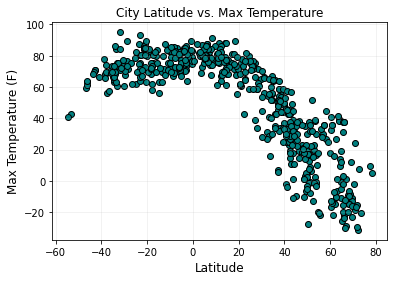

In [77]:
# Setting x and y values 
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

# Save the image 
#fig_path = os.path.abspath() # Figures out the absolute path for you in case your working directory moves around.
#fig.savefig(my_path + '/Sub Directory/graph.png')

### ONE-SENTENCE DESCRIPTION: 
The graph above is displaying the max temperature (y-axis) for all cities in the dataset (the circles) organized by latitude (x-axis). This graph suggests that cities north of the equator (>0 Lat) might have a lower max temp. 

## Latitude vs. Humidity Plot

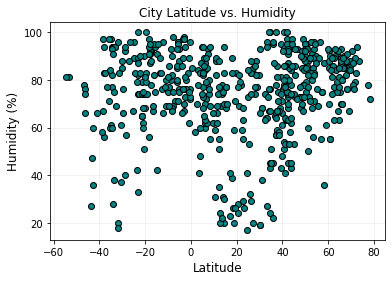

In [78]:
# Setting x and y values 
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

### ONE-SENTENCE DESCRIPTION: 
The graph above is displaying the recent humidity (%)(y-axis) for all cities in the dataset (the circles) organized by latitude (x-axis). This graph does not have an immediately discernible trend, other than cities tending to cluster at or greater than 60% humidity. 

## Latitude vs. Cloudiness Plot

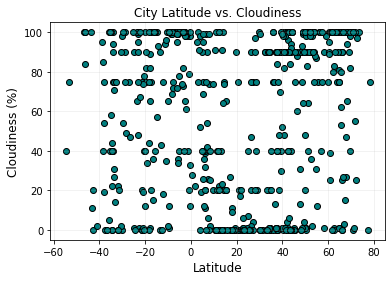

In [79]:
# Setting x and y values 
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

### ONE-SENTENCE DESCRIPTION:
The graph above is displaying the recent cloudiness (%)(y-axis) for all cities in the dataset (the circles) organized by latitude (x-axis). This graph also does not have an immediately discernible trend.

## Latitude vs. Wind Speed Plot

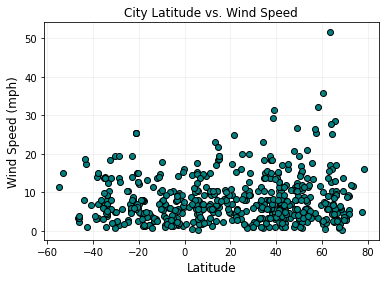

In [80]:
# Setting x and y values 
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

### ONE-SENTENCE DESCRIPTION:
The graph above is displaying the recent wind speed (mph)(y-axis) for all cities in the dataset (the circles) organized by latitude (x-axis). Perhaps one observable trend from this graph: it appears that there is greater range in the wind speeds of cities north of equator (>Lat 0).  

## Linear Regression

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [4]:
# Making two separate dfs for north and south hemisphere 
north_hemi = weather_data.loc[weather_data["Lat"] >= 0]
south_hemi = weather_data.loc[weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8765697068804407


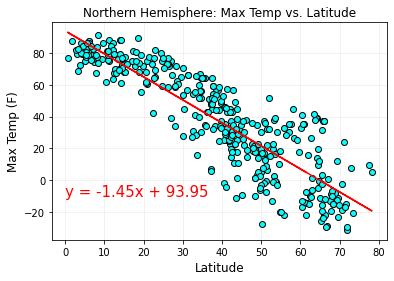

In [104]:
# Setting x and y values 
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]

# Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,-10), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="aqua", edgecolors="black")
plt.title("Northern Hemisphere: Max Temp vs. Latitude")
plt.ylabel("Max Temp (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.44590906959636567


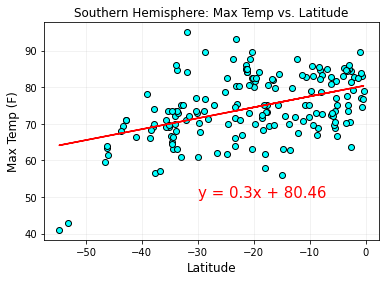

In [103]:
# Setting x and y values 
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]

# Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,50), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="aqua", edgecolors="black")
plt.title("Southern Hemisphere: Max Temp vs. Latitude")
plt.ylabel("Max Temp (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

### ANALYSIS OF NORTH/SOUTH-HEMI MAX TEMP:
The graphs above are displaying the max temperature (y-axis) of cities in the dataset arranged by latitude (x-axis) and divided into two groups--the southern hemisphere and the northern hemisphere. What we see from both of these graphs is that max temperatures are higher for cities closer to the equator. This relationship is weakly positively correlated for the southern hemisphere (moving towards the equator), and strongly negatively correlated for the northern hemisphere (moving away from the equator). It is plausible that the seasons may be playing a role, as the northern hemisphere is currently experiencing winter.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.30945504958053144


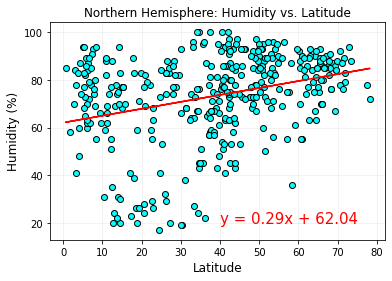

In [108]:
# Setting x and y values 
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]

# Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="aqua", edgecolors="black")
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22520675986668628


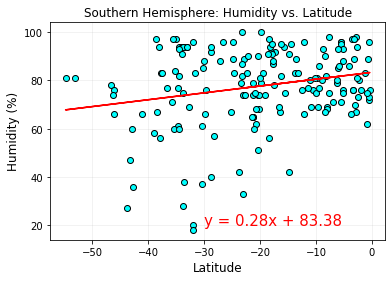

In [6]:
# Setting x and y values 
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]

# Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,20), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="aqua", edgecolors="black")
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

### ANALYSIS OF NORTH/SOUTH-HEMI HUMIDITY:
The graphs above are displaying the humidity (y-axis) of cities in the dataset arranged by latitude (x-axis) and divided into two groups--the southern hemisphere and the northern hemisphere. These graphs reflect a weak positive correlation between humidity and latitude. Rather than being centered around the equator as shown in the previous section, the humidity seems to increase the more north a city is located.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2989895417151042


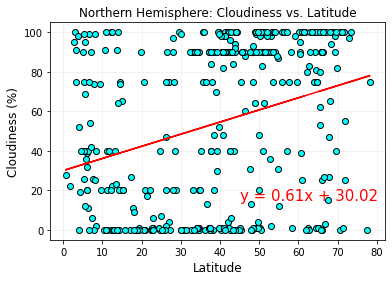

In [113]:
# Setting x and y values 
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]

# Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,15), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="aqua", edgecolors="black")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23659107153505674


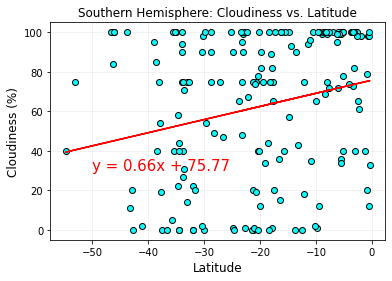

In [15]:
# Setting x and y values 
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]

# Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="aqua", edgecolors="black")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

### ANALYSIS OF NORTH/SOUTH-HEMI CLOUDINESS:
The graphs above are displaying the cloudiness (y-axis) of cities in the dataset arranged by latitude (x-axis) and divided into two groups--the southern hemisphere and the northern hemisphere. These graphs also reflect a very weak positive correlation, if any, between cloudiness and latitude. Cloudiness seems to increase the more north a city is located.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04083196500915729


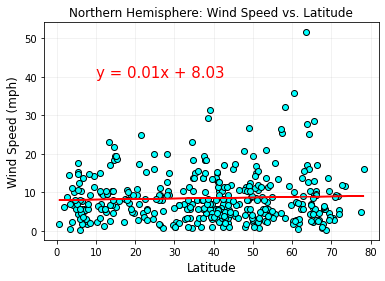

In [116]:
# Setting x and y values 
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]

# Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="aqua", edgecolors="black")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1644284507948641


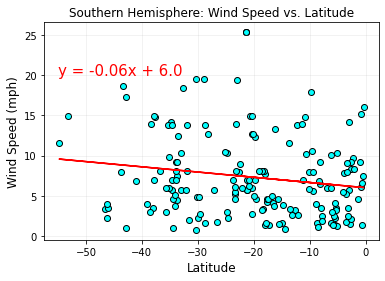

In [122]:
# Setting x and y values 
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]

# Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,20), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="aqua", edgecolors="black")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

### ANALYSIS OF NORTH/SOUTH-HEMI WIND SPEED:
The graphs above are displaying the wind speed (y-axis) of cities in the dataset arranged by latitude (x-axis) and divided into two groups--the southern hemisphere and the northern hemisphere. These graphs do not reflect a notable relationship between wind speed and latitude; the r-values returned are too low. 